In [17]:
import pandas as pd
import numpy as np
import cv2

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from subprocess import check_call
from google.colab.patches import cv2_imshow

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df = pd.read_excel('datasetbantuan.xlsx')
df = df.loc[1:,:]
df.head(375)

,NO,NAMA,Luas lantai,Lantai,Dinding,Tdk mem.,Tdk ada,Air Minum,Kayu bakar/,daging 1x,...,Tdk mem..1,Lansia,Disabilitas,Usia Dini,Ibu Hamil,Anak SD,Anak SMP,Anak SMA,Unnamed: 23,Kategori
1,1.0,AAM WARLIAH,0,1,1,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,BLT
2,2.0,CEWIH,0,0,1,1,0,1,0,1,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,BLT
3,3.0,MARYANTO,1,1,0,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,BLT
4,4.0,NGATMI,1,1,0,1,0,1,0,1,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,BLT
5,5.0,ROHANI,1,0,1,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,BLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,371.0,OYOK,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK
372,372.0,DAHLIA,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK
373,373.0,KARSIH,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK
374,374.0,ADE ATIKAH,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK


In [19]:
col = ['no','nama','luas_lantai','lantai_tanah',
       'dinding_bambu','tidak_punya_mck','tidak_punya_listrik',
       'air_minum_sumur','kayu_bakar','daging_satu_seminggu',
       'satu_baju_setahun','makan_satu_dua_sehari','tidak_sanggup_berobat',
       'penghasilan_dibawah_600','kk_tidak_sekolah','tidak_punya_tabungan',
       'lansia','disabilitas','usia_dini','ibu_hamil','anak_sd',
       'anak_smp','anak_sma','not_set','label']

In [20]:
arr = df.to_numpy()
df = pd.DataFrame(arr, columns=col)
df.head(375)

,no,nama,luas_lantai,lantai_tanah,dinding_bambu,tidak_punya_mck,tidak_punya_listrik,air_minum_sumur,kayu_bakar,daging_satu_seminggu,...,tidak_punya_tabungan,lansia,disabilitas,usia_dini,ibu_hamil,anak_sd,anak_smp,anak_sma,not_set,label
0,1.0,AAM WARLIAH,0,1,1,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,BLT
1,2.0,CEWIH,0,0,1,1,0,1,0,1,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,BLT
2,3.0,MARYANTO,1,1,0,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,BLT
3,4.0,NGATMI,1,1,0,1,0,1,0,1,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,BLT
4,5.0,ROHANI,1,0,1,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,BLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,371.0,OYOK,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK
371,372.0,DAHLIA,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK
372,373.0,KARSIH,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK
373,374.0,ADE ATIKAH,0,0,0,0,0,1,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TIDAK


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       375 non-null    object
 1   nama                     375 non-null    object
 2   luas_lantai              375 non-null    object
 3   lantai_tanah             375 non-null    object
 4   dinding_bambu            375 non-null    object
 5   tidak_punya_mck          375 non-null    object
 6   tidak_punya_listrik      375 non-null    object
 7   air_minum_sumur          375 non-null    object
 8   kayu_bakar               375 non-null    object
 9   daging_satu_seminggu     375 non-null    object
 10  satu_baju_setahun        375 non-null    object
 11  makan_satu_dua_sehari    375 non-null    object
 12  tidak_sanggup_berobat    375 non-null    object
 13  penghasilan_dibawah_600  375 non-null    object
 14  kk_tidak_sekolah         375 non-null    o

In [23]:
df.isnull().sum()

no                           0
nama                         0
luas_lantai                  0
lantai_tanah                 0
dinding_bambu                0
tidak_punya_mck              0
tidak_punya_listrik          0
air_minum_sumur              0
kayu_bakar                   0
daging_satu_seminggu         0
satu_baju_setahun            0
makan_satu_dua_sehari        0
tidak_sanggup_berobat        0
penghasilan_dibawah_600      0
kk_tidak_sekolah             0
tidak_punya_tabungan         0
lansia                       0
disabilitas                  0
usia_dini                    0
ibu_hamil                    0
anak_sd                      0
anak_smp                     0
anak_sma                     1
not_set                    148
label                        0
dtype: int64

In [24]:
df['anak_sma'].replace('', np.nan, inplace=True)
df.dropna(subset=['anak_sma'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 374
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       374 non-null    object
 1   nama                     374 non-null    object
 2   luas_lantai              374 non-null    object
 3   lantai_tanah             374 non-null    object
 4   dinding_bambu            374 non-null    object
 5   tidak_punya_mck          374 non-null    object
 6   tidak_punya_listrik      374 non-null    object
 7   air_minum_sumur          374 non-null    object
 8   kayu_bakar               374 non-null    object
 9   daging_satu_seminggu     374 non-null    object
 10  satu_baju_setahun        374 non-null    object
 11  makan_satu_dua_sehari    374 non-null    object
 12  tidak_sanggup_berobat    374 non-null    object
 13  penghasilan_dibawah_600  374 non-null    object
 14  kk_tidak_sekolah         374 non-null    o

In [26]:
cek = df["label"].value_counts()
cek

BLT      146
TIDAK    141
PKH       87
Name: label, dtype: int64

In [27]:
label_encoder = preprocessing.LabelEncoder()
df['label_enc']= label_encoder.fit_transform(df['label'])
df.head(1)

,no,nama,luas_lantai,lantai_tanah,dinding_bambu,tidak_punya_mck,tidak_punya_listrik,air_minum_sumur,kayu_bakar,daging_satu_seminggu,...,lansia,disabilitas,usia_dini,ibu_hamil,anak_sd,anak_smp,anak_sma,not_set,label,label_enc
0,1.0,AAM WARLIAH,0,1,1,1,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,BLT,0


In [28]:
print(df['label'].unique())
print(df['label_enc'].unique())

['BLT' 'TIDAK' 'PKH']
[0 2 1]


In [29]:
X = df.loc[:,'luas_lantai':'anak_sma']
y = df['label_enc']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [31]:
len(y_train)

261

In [32]:
len(y_test)

113

In [33]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9911504424778761


In [34]:
#Confusion Matrix
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Pastel1",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

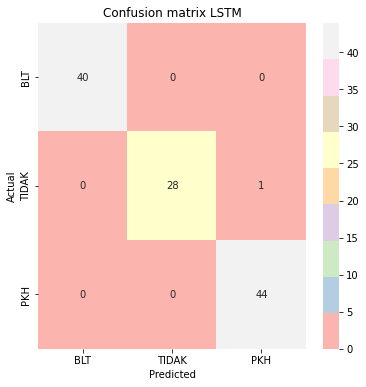

In [35]:
print_conf(y_test, y_pred, ['BLT', 'TIDAK', 'PKH'], title="Confusion matrix LSTM")

In [36]:
cross_val_score(model, X, y, cv=10)

array([1.        , 0.94736842, 0.97368421, 0.97368421, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.97297297])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.97      0.98        29
           2       0.98      1.00      0.99        44

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



In [38]:
from sklearn.tree import export_graphviz
export_graphviz(
    model,
    out_file = "tree.dot",
    feature_names = col[2:23],
    class_names = ['BLT', 'TIDAK', 'PKH' ],
    rounded= True,
    filled =True,
    special_characters=True
)

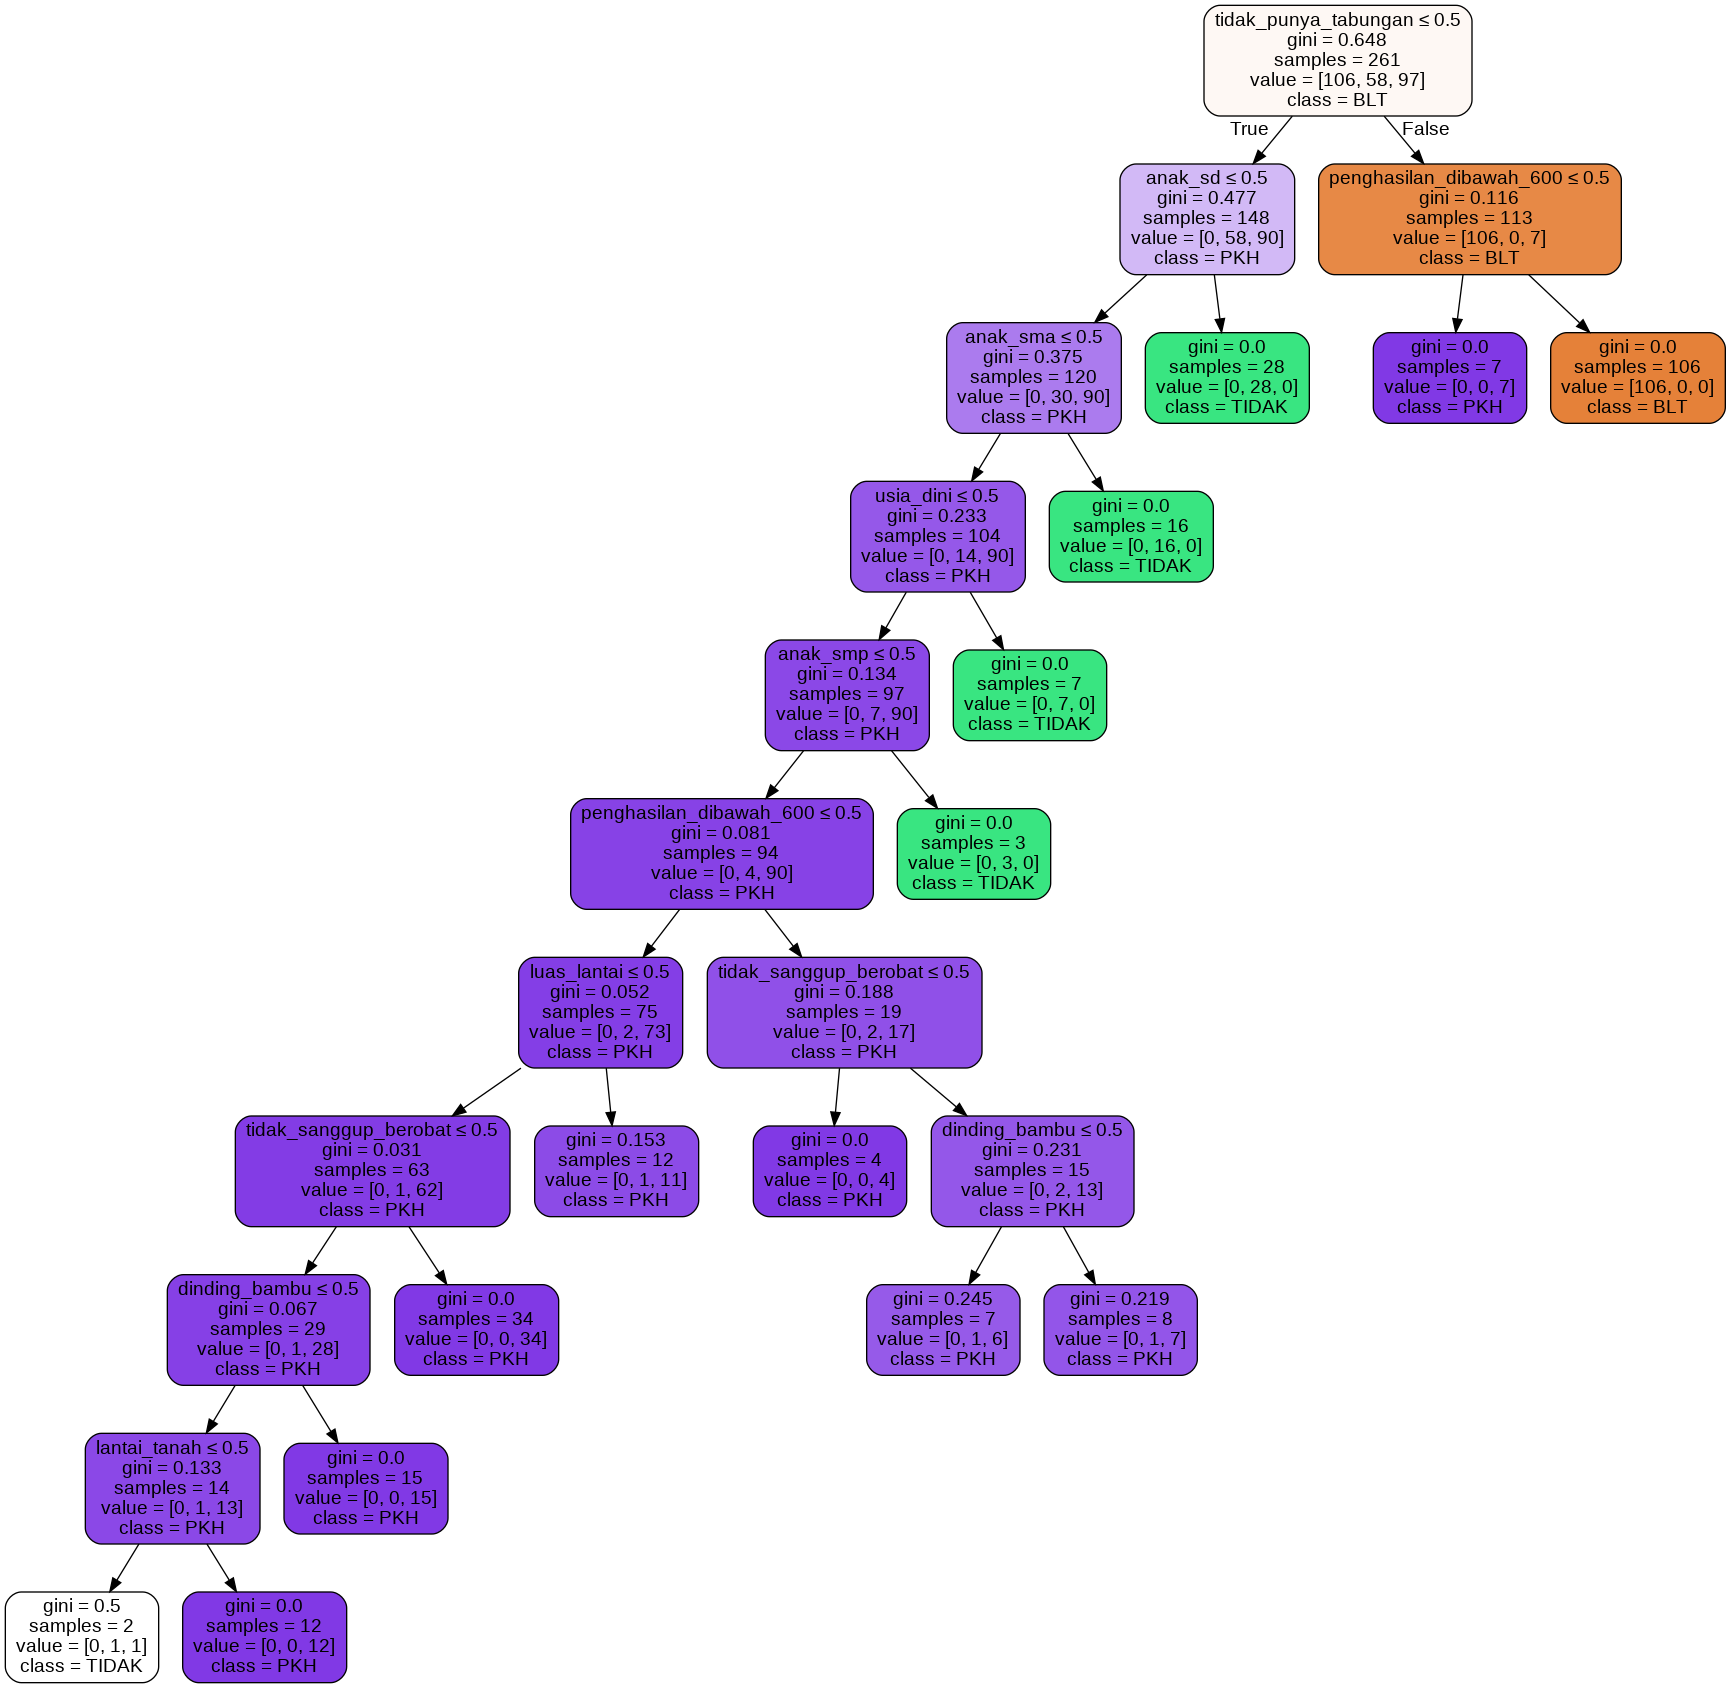

In [39]:
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])
tree_image = cv2.imread('tree.png')
cv2_imshow(tree_image)

In [40]:
model.cost_complexity_pruning_path(X,y)

{'ccp_alphas': array([0.00000000e+00, 1.89056339e-04, 1.89695043e-04, 7.17256600e-04,
        8.72805436e-04, 9.28484298e-04, 2.84867869e-02, 4.24471991e-02,
        5.47021356e-02, 7.61105269e-02, 1.05923406e-01, 3.17944908e-01]),
 'impurities': array([0.02110476, 0.02129382, 0.02148352, 0.02220077, 0.02481919,
        0.02574767, 0.05423446, 0.09668166, 0.15138379, 0.22749432,
        0.33341773, 0.65136264])}

In [41]:
data = [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0]

In [42]:
model.predict([data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])